In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import joblib
import warnings
# warnings.filterwarnings("ignore", category=UserWarning)
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
doubt- same store id has different market id, is it by mistake or a single store comes under diff markets ids

In [5]:
df = pd.read_csv("dataset.csv",encoding="cp1252")

In [3]:
df.shape

(197428, 14)

In [4]:
#df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [95]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [6]:
df["market_id"] = (
    df.groupby("store_id")["market_id"]
      .transform(lambda x: x.ffill().bfill())
)


In [5]:
df.isnull().sum()

market_id                       3
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [5]:
#df['market_id']=df['market_id'].astype('str')

Explanation : Changing datatype of date to a proper format & converting delivery time in minutes.

In [7]:
df['created_at'] = pd.to_datetime(
    df['created_at'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

df['actual_delivery_time'] = pd.to_datetime(
    df['actual_delivery_time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

df["delivery_time_min"] = (
    df["actual_delivery_time"] - df["created_at"]
).dt.total_seconds() / 60

Explanation: Extracting year, month, quarter, day name from date

In [8]:
df['year'] = df['created_at'].dt.year
df['month'] = df['created_at'].dt.month
df['quarter'] = df['created_at'].dt.quarter
df["Day_Name"] = df['created_at'].dt.day_name()

In [8]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_min,year,month,quarter,Day_Name
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,62.983333,2015,2,1,Friday
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,67.066667,2015,2,1,Tuesday
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,29.683333,2015,1,1,Thursday
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,51.250000,2015,2,1,Tuesday
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,39.833333,2015,2,1,Sunday


In [9]:
df.isnull().sum()

market_id                       3
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
delivery_time_min               7
year                            0
month                           0
quarter                         0
Day_Name                        0
dtype: int64

In [ ]:
issue -

same store id has multiple market id, store primary category. 

In [9]:
# df["market_id"] = (
#     df.groupby("store_id")["market_id"]
#       .transform(lambda x: x.ffill().bfill())
# )


In [9]:
#df[df["market_id"].isna()]

df.dropna(subset=['market_id'],inplace=True)

Explanation : Handling missing values in Store primary category by imputing most 
frequent category in a particulat store id

In [10]:
category_mode = (
    df.dropna(subset=["store_primary_category"])
      .groupby("store_id")["store_primary_category"]
      .agg(lambda x: x.mode().iloc[0])
)

df["store_primary_category"] = df["store_primary_category"].fillna(
    df["store_id"].map(category_mode)
)

df["store_primary_category"]=df["store_primary_category"].fillna('unknown')

Explanation : Handling missing values in order protocol by imputing most 
frequent protocol in a particulat store id

In [11]:
#df["store_primary_category"]=df["order_protocol"].fillna('Unknown')

order_protocol = (
    df.dropna(subset=["order_protocol"])
      .groupby("store_id")["order_protocol"]
      .agg(lambda x: x.mode().iloc[0])
)

df["order_protocol"] = df["order_protocol"].fillna(
    df["store_id"].map(order_protocol)
)

Explanation : Missing actual delivery time- storewise calculated avg delivery time ,added that much delta time to created date and filled the missing alues for actual delivery time.

In [12]:
avg_delivery_min  = (
    df.dropna(subset=["actual_delivery_time"])
      .groupby("store_id")["delivery_time_min"]
      .agg(lambda x: x.mean())
)

# df["predicted_delivery_time"] = df["created_at"] + pd.to_timedelta(
#     df["store_id"].map(avg_delivery_min),
#     unit="m"
# )

In [13]:
mask = df["actual_delivery_time"].isna()

df.loc[mask, "actual_delivery_time"] = (
    df.loc[mask, "created_at"] +
    pd.to_timedelta(df.loc[mask, "store_id"].map(avg_delivery_min), unit="m")
)


Explanation :

To impute total onshift partners, total busy partners, total outstanding partners, i found median values of available data for these columns per store per hour.

In [14]:
cols = [
    "total_onshift_partners",
    "total_busy_partners",
    "total_outstanding_orders"
]

df["order_hour"] = df["created_at"].dt.hour

for c in cols:
    df[c] = df[c].fillna(
        df.groupby(["store_id",'order_hour'])[c].transform("median")
    )


Use median per market per hour wherever data not available for store & order hr.

In [15]:
df["order_hour"] = df["created_at"].dt.hour

for c in cols:
    df[c] = df[c].fillna(
        df.groupby(["market_id","order_hour"])[c].transform("median")
    )

In [16]:
df[df['total_onshift_partners'].isna()].shape

(16141, 20)

In [16]:
for c in cols:
    for c in cols:
       df[c] = df[c].fillna(0)
    


In [90]:
df.head(5)

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,year,month,quarter,Day_Name,delivery_time_min,order_hour
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,2015,2,1,Friday,62.983333,22
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,2015,2,1,Tuesday,67.066667,21
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,indian,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,2015,1,1,Thursday,29.683333,20
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,indian,1.0,6,6900,5,600,1800,1.0,1.0,2.0,2015,2,1,Tuesday,51.250000,21
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,indian,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,2015,2,1,Sunday,39.833333,2


## EDA

## dist of order volumes across diff markets?

In [30]:
Orders_count=df.groupby('market_id')['total_items'].sum().reset_index()

Orders_count

,market_id,total_items
0,1.0,124536
1,2.0,173379
2,3.0,73728
3,4.0,159651
4,5.0,55548
5,6.0,44207


Observation :

Market id 2 is having the most orders

## How does the average delivery time vary across diffrent store primary category.

In [38]:
Orders_count=df.groupby('store_primary_category')
['delivery_time_min'].mean().reset_index().sort_values(by= 'delivery_time_min',ascending=False )
Orders_count



,store_primary_category,delivery_time_min
39,italian,69.893435
65,spanish,56.178378
17,caribbean,56.172353
9,brazilian,55.820767
8,belgian,54.991667
...,...,...
28,fast,44.020392
33,gluten-free,42.028495
42,kosher,41.576144
37,indonesian,40.750000


Obsevation:

Italian, Spanish, Caribbean, brazilian, belgian are top 5 category taking more than 50 mins to deliver which shows either operational challenges for these stores of these categories like too many orders, partners not available to deliver,could be far away from the location of orders.

## what is the peak hours for orders

In [39]:
hourly_orders = (
    df.groupby("order_hour")
      .size()
      .reset_index(name="order_count")
      .sort_values("order_count", ascending=False)
)

hourly_orders


,order_hour,order_count
2,2,36976
1,1,28190
3,3,27067
15,20,15560
4,4,15250
14,19,13541
0,0,12669
16,21,11465
17,22,8821
18,23,8161


## Which day of the week sees highest order volume

In [42]:
week_orders = (
    df.groupby("Day_Name")
      .size()
      .reset_index(name="order_count")
      .sort_values("order_count", ascending=False)
)

week_orders


,Day_Name,order_count
2,Saturday,34541
3,Sunday,33617
0,Friday,27875
1,Monday,27403
4,Thursday,25673
6,Wednesday,24254
5,Tuesday,24062


Observation:

Saturday & sunday sees the most orders count.

In [44]:
df["total_items"].corr(df["subtotal"]) #pearson

0.558068781062058

In [45]:
df["total_items"].corr(df["subtotal"], method="spearman")

0.6643067338962773

<Axes: title={'center': 'Items vs Subtotal'}, xlabel='total_items', ylabel='subtotal'>

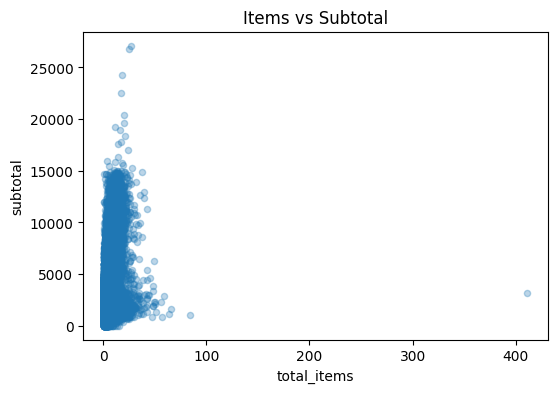

In [46]:
df.plot.scatter(
    x="total_items",
    y="subtotal",
    alpha=0.3,
    figsize=(6,4),
    title="Items vs Subtotal"
)


Observation:

Most totla items between 1-50 contributing to higher subtotal, whereas few outliers present like total items ordered more than 400 but subtotal is less which shows low pricing of these products

In [48]:
## df.groupby("store_primary_category")[["total_items","subtotal"]].corr()


cat_corr = (
    df.groupby("store_primary_category")[["total_items","subtotal"]]
      .corr()
      .unstack()
      .iloc[:,1]
      .reset_index(name="item_subtotal_corr")
)

cat_corr.sort_values("item_subtotal_corr", ascending=False)


,store_primary_category,item_subtotal_corr
37,indonesian,1.000000
12,bubble-tea,0.957498
61,singaporean,0.905062
33,gluten-free,0.898639
63,soup,0.896580
...,...,...
1,african,0.312117
28,fast,0.160067
3,alcohol-plus-food,NaN
8,belgian,NaN


Observation:

As item count increases, subtotal usually increases in rank, but not linearly.
Increasing item count alone won’t strongly drive revenue — item value matters.
Category like indonesian, bubble tea, singaporian are top 3 category which are showing stronger revenue scaling with item count than rest with.

## Analyse the distribution of delivery times? are there outliers?

Explanation:  

There are outliers for delivery time like 140000 mins which seems like a mis entry, so we can remove this and on observation most of delivery is less than 150 min
hence we will capture 99% of data for the analysis

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_min,year,month,quarter,Day_Name,order_hour
1976,4.0,2015-02-02 03:04:52,2015-02-02 05:47:27,333222170ab9edca4785c39f55221fe7,pizza,1.0,2,2940,2,1025,1915,49.0,48.0,95.0,162.583333,2015,2,1,Monday,3
2517,4.0,2015-01-29 20:44:13,2015-01-30 01:57:42,cf2226ddd41b1a2d0ae51dab54d32c36,fast,3.0,1,779,1,559,559,77.0,72.0,109.0,313.483333,2015,1,1,Thursday,20
2690,1.0,2014-10-19 05:24:15,2015-01-25 19:11:54,675f9820626f5bc0afb47b57890b466e,italian,1.0,1,1695,1,1595,1595,12.0,11.0,13.0,141947.650000,2014,10,4,Sunday,5
2921,2.0,2015-01-30 20:42:02,2015-01-30 23:41:42,34be90676412d14c80f85809d8e3b97b,indian,2.0,1,1299,1,1299,1299,49.0,35.0,45.0,179.666667,2015,1,1,Friday,20
2926,1.0,2015-02-05 02:41:28,2015-02-05 05:16:32,35b47299c1130953d286c976e9c608dc,british,5.0,2,1695,2,150,1400,13.0,14.0,28.0,155.066667,2015,2,1,Thursday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193894,1.0,2015-02-07 19:21:38,2015-02-08 01:36:50,a41b7c188df8001c036825089b562709,breakfast,2.0,5,1950,5,350,400,11.0,11.0,8.0,375.200000,2015,2,1,Saturday,19
194328,5.0,2015-02-02 21:47:17,2015-02-03 00:41:35,380a2d63cef1d5d702278e2b561e2e51,asian,2.0,2,875,2,375,375,9.0,11.0,15.0,174.300000,2015,2,1,Monday,21
194831,1.0,2015-02-02 02:32:55,2015-02-02 06:20:40,d0aa518d4d3bfc721aa0b8ab4ef32269,dessert,1.0,8,8725,5,495,1950,18.0,21.0,30.0,227.750000,2015,2,1,Monday,2
196925,1.0,2015-02-05 02:11:36,2015-02-05 05:04:44,1a21d8c9bbb99bca627434dbf4b98d01,japanese,3.0,7,8025,7,600,1600,24.0,24.0,23.0,173.133333,2015,2,1,Thursday,2


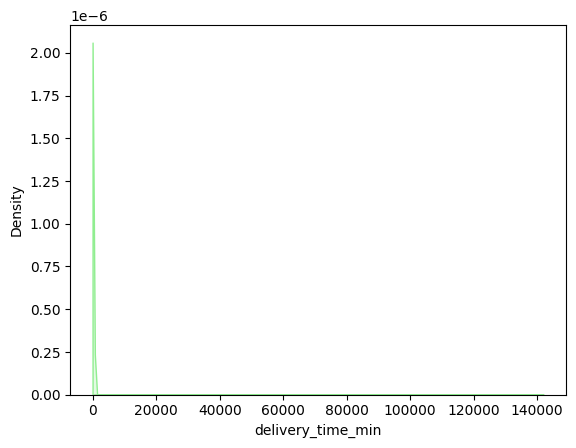

In [52]:
sns.kdeplot(df['delivery_time_min'],fill=True,color="lightgreen")

#df[df['delivery_time_min']>150]

Since there are extreme outliers which is completely crushing the visualization, by removing such cases we have 99% of data delivered within few hrs. 

<Axes: ylabel='Frequency'>

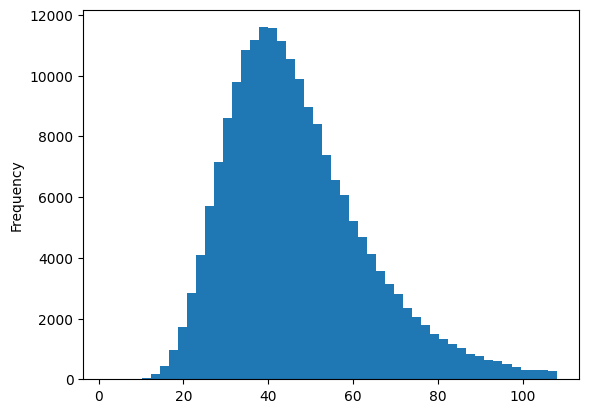

In [74]:
p99 = df["delivery_time_min"].quantile(0.99)

df_clip = df[df["delivery_time_min"] <= p99]

df_clip["delivery_time_min"].plot(kind="hist", bins=50)


<Axes: ylabel='Density'>

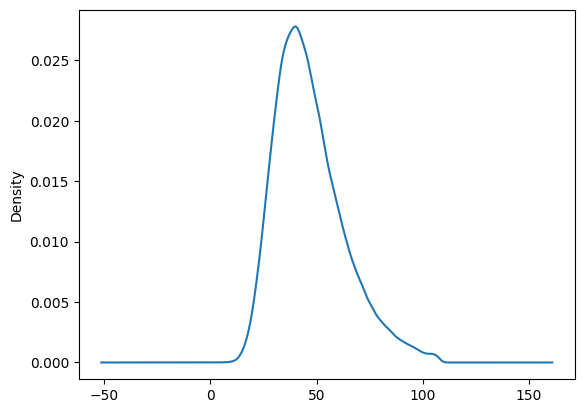

In [51]:
df_clip["delivery_time_min"].plot(kind="kde")

Observation:

On an avg nearly 42-50 mins on an avg is taken to deliver.

## what percentage of orders delivered under 30 mins

In [17]:


(df['delivery_time_min']>30).mean()*100

86.8390528048626

## Correlation between order volume & busy partners.

In [18]:
df["total_busy_partners"].corr(df.index.to_series())

-0.009937312194927746

In [20]:
hourly = (
    df.groupby("order_hour")
      .agg(
          order_volume=("store_id", "count"),
          avg_busy_partners=("total_busy_partners", "mean")
      )
      .reset_index()
)


In [21]:
hourly

,order_hour,order_volume,avg_busy_partners
0,0,12669,25.209133
1,1,28190,48.180330
2,2,36976,60.731245
3,3,27067,60.951528
4,4,15250,43.583410
5,5,7096,23.434470
6,6,1416,13.182910
7,7,11,8.090909
8,8,2,0.000000
9,14,40,0.400000


In [22]:
hourly["order_volume"].corr(hourly["avg_busy_partners"])


0.9595243337534008

<Axes: title={'center': 'Order Volume vs Busy Partners'}, xlabel='order_volume', ylabel='avg_busy_partners'>

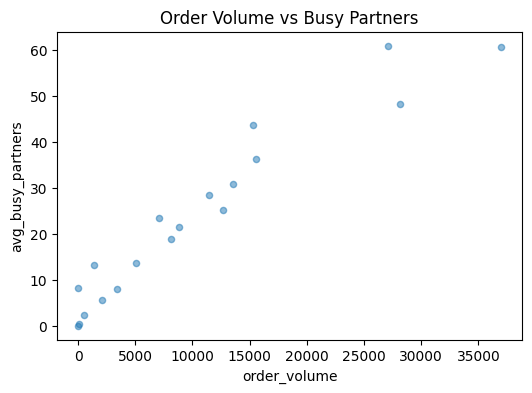

In [23]:
hourly.plot.scatter(
    x="order_volume",
    y="avg_busy_partners",
    alpha=0.5,
    figsize=(6,4),
    title="Order Volume vs Busy Partners"
)


In [ ]:
Hourly order volume has a 0.95 correlation with busy partners, indicating highly responsive capacity scaling.


## Avg delivery time by week name

In [24]:
df.groupby('Day_Name')['delivery_time_min'].median()

Day_Name
Friday       42.350000
Monday       46.783333
Saturday     47.100000
Sunday       45.316667
Thursday     43.383333
Tuesday      43.333333
Wednesday    41.583333
Name: delivery_time_min, dtype: float64

## efificiency of order protocols in terms of delivery time.

In [25]:
df.groupby('order_protocol')['delivery_time_min'].mean()

order_protocol
1.0    52.509784
2.0    47.360891
3.0    46.954079
4.0    48.423360
5.0    45.705135
6.0    60.978892
7.0    41.370175
Name: delivery_time_min, dtype: float64

In [26]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'delivery_time_min', 'year', 'month',
       'quarter', 'Day_Name', 'order_hour'],
      dtype='object')

## What is the relationship between on shift partners &  delivery times during peak hours.

In [38]:
hourly_orders1 = (
    
    df.groupby("order_hour")
      .agg(
          order_volume=("store_id","count"),
          avg_onshift_partners=("total_onshift_partners","mean")
      ).sort_values(by='order_volume',ascending=False)
      .dropna().head(5)
)    
hourly_orders1


,order_volume,avg_onshift_partners
order_hour,,
2,36976,66.991467
1,28190,53.977581
3,27067,64.922470
20,15560,37.458644
4,15250,44.042492


In [ ]:
hourly_orders1

In [39]:
hourly_orders1["order_volume"].corr(hourly_orders1["avg_onshift_partners"])

0.9070205392278159

This analysis shows that with increase in the volume , no. of onshift partners also increases or remains more.
Hour-wise demand and partner utilization show a ~0.90 correlation, indicating strong operational alignment between order inflow and rider availability, though some variance remains during peak periods.

## Determine the impact of distinct items & total items on delivery time.


<Axes: xlabel='total_items', ylabel='delivery_time_min'>

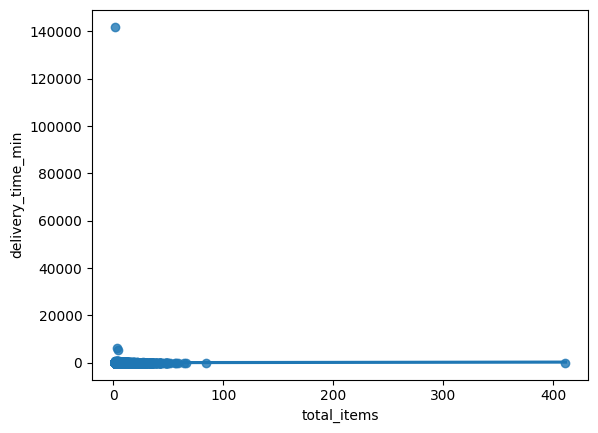

In [41]:
sns.regplot(x="total_items", y="delivery_time_min", data=df)


In [43]:
df[["num_distinct_items","total_items"]].corr()

,num_distinct_items,total_items
num_distinct_items,1.000000,0.763912
total_items,0.763912,1.000000


In [44]:
df['num_distinct_items'].corr(df['total_items'])

0.7639119123449161

In [76]:
data = df_clip[["num_distinct_items","total_items","delivery_time_min"]].dropna()
X = data[["num_distinct_items","total_items"]]
y = data["delivery_time_min"]

import statsmodels.api as sm

X = sm.add_constant(X)   # adds intercept

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      delivery_time_min   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2801.
Date:                Mon, 09 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:51:16   Log-Likelihood:            -8.2098e+05
No. Observations:              195443   AIC:                         1.642e+06
Df Residuals:                  195440   BIC:                         1.642e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 42.3089      0

R2 --0 means item counts do not really explain anything about delivery time.
num_dist_items= corfficient =1.7 means with every increase in distinct items , delivery time increases by 1.7 mins.
total_items= corfficient =-0.07 means with  increase in total items , delivery time does not really get affected.


## Asses the role of item price range in an orders total value.hint: calculate the range max price - min price and then correlate with subtotal.

In [46]:
df["price_range"] = df["max_item_price"] - df["min_item_price"]
df["price_range"].corr(df["subtotal"])

0.5095705342514474

<Axes: title={'center': 'Item Price Range vs Subtotal'}, xlabel='price_range', ylabel='subtotal'>

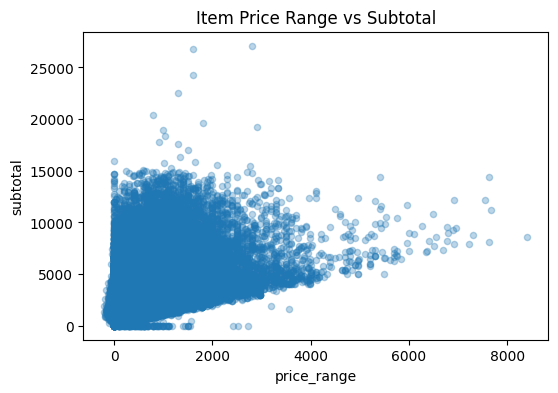

In [47]:
df.plot.scatter(
    x="price_range",
    y="subtotal",
    alpha=0.3,
    figsize=(6,4),
    title="Item Price Range vs Subtotal"
)


Observation:

As price range increases, subtotal generally increases but not tight, relationship is moderate, not strong.
Item price diversity contributes to higher order value, but basket size and item count still dominate revenue.

## What effect does store primary category have on the likelihood of orders being more than average order value.


In [82]:
Avg_Order_Value = df['subtotal'].median()

In [83]:
Avg_Order_Value

2200.0

In [55]:
above_aov = df[df["subtotal"] > Avg_Order_Value]

In [84]:
above_aov.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_min,year,month,quarter,Day_Name,order_hour,price_range
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,62.983333,2015,2,1,Friday,22,682
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,indian,1.0,6,6900,5,600,...,1.0,1.0,2.0,51.250000,2015,2,1,Tuesday,21,1200
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,indian,1.0,3,3900,3,1100,...,6.0,6.0,9.0,39.833333,2015,2,1,Sunday,2,500
5,3.0,2015-01-28 20:30:38,2015-01-28 21:08:58,f0ade77b43923b38237db569b016ba25,indian,1.0,3,5000,3,1500,...,2.0,2.0,2.0,38.333333,2015,1,1,Wednesday,20,400
6,3.0,2015-01-31 02:16:36,2015-01-31 02:43:00,f0ade77b43923b38237db569b016ba25,indian,1.0,2,3900,2,1200,...,10.0,9.0,9.0,26.400000,2015,1,1,Saturday,2,1500


In [90]:
from sklearn.preprocessing import LabelEncoder
#

le = LabelEncoder()
above_aov["Category_encoded"] = le.fit_transform(above_aov["store_primary_category"])
above_aov['total_items'].corr(above_aov['Category_encoded'])

C:\Users\mousumi dash\AppData\Local\Temp\ipykernel_19072\2144568155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  above_aov["Category_encoded"] = le.fit_transform(above_aov["store_primary_category"])


0.008689876825397524

Observation:

Very weak positive relationship between Store category & subtotal being aov greater than average price.

## How many categories are there where ordered value is greater than avg value?

In [62]:
pct_above_aov=above_aov.groupby('store_primary_category').agg(above_avg_count=('subtotal','count'))

In [64]:
# total orders per category
total_orders = df.groupby("store_primary_category")["subtotal"].count()

In [70]:
pct_above_aov["pct_above_AOV"] = (
    pct_above_aov["above_avg_count"] / total_orders * 100
)

pct_above_aov.reset_index().sort_values(by='pct_above_AOV',ascending=False).head(20)

,store_primary_category,above_avg_count,pct_above_AOV
45,moroccan,20,80.000000
17,cheese,17,70.833333
12,burmese,572,66.589057
34,irish,36,65.454545
35,italian,4629,63.550247
62,steak,695,63.296903
53,russian,12,63.157895
61,spanish,23,62.162162
41,malaysian,63,61.764706
57,singaporean,20,60.606061


## Explore the distribution of delivery times. is there a significant variation within market or store category?

In [75]:
std_delivery = (
    df_clip.groupby(["market_id"])["delivery_time_min"]
      .std()
      .reset_index(name="std_delivery_time")
)

std_delivery

,market_id,std_delivery_time
0,1.0,18.263279
1,2.0,15.280096
2,3.0,16.246326
3,4.0,15.973511
4,5.0,15.729988
5,6.0,16.617103


Observation:

Market id 2 has highest std in delivery times, as compared to others. 

## How does availibility of delivery partners (onshift & busy) affects delivery times across different marketids.

In [78]:
df_onshift_busypartners= df_clip.groupby('market_id').agg(avg_onshift_partners=('total_onshift_partners','mean'),
                           avg_busy_partners=('total_busy_partners','mean'),
                           avg_delivery_time=('delivery_time_min','mean')).reset_index()

In [79]:
df_onshift_busypartners

,market_id,avg_onshift_partners,avg_busy_partners,avg_delivery_time
0,1.0,24.301395,23.564596,49.704945
1,2.0,62.550336,57.637420,45.499643
2,3.0,18.807488,17.163752,46.690032
3,4.0,60.486533,57.344150,46.572279
4,5.0,23.880906,19.942584,45.824881
5,6.0,44.016886,40.586798,46.340483


In [80]:
df_onshift_busypartners[["avg_onshift_partners","avg_busy_partners","avg_delivery_time"]].corr()


,avg_onshift_partners,avg_busy_partners,avg_delivery_time
avg_onshift_partners,1.000000,0.998024,-0.433482
avg_busy_partners,0.998024,1.000000,-0.383725
avg_delivery_time,-0.433482,-0.383725,1.000000


Observation:

Onshift vs Busy: 0.998-Markets with more onshift partners also have more busy partners.
Onshift vs Delivery Time: –0.43 ,More onshift partners → faster deliveries.
Busy vs Delivery Time: –0.38 ,More busy partners → slightly faster delivery.
Onshift and busy partners are almost perfectly correlated, indicating redundancy. Both show moderate negative correlation (~–0.4) with delivery time, suggesting partner availability helps but is not the primary driver.